In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [11]:
df = pd.read_csv("mobile_sales_data.csv")

In [12]:
# Convert date columns to datetime
df['Inward Date'] = pd.to_datetime(df['Inward Date'])
df['Dispatch Date'] = pd.to_datetime(df['Dispatch Date'])

In [13]:
# Create a revenue column
df['Revenue'] = df['Price'] * df['Quantity Sold']


In [17]:
# Set the visual style
sns.set(style="whitegrid")


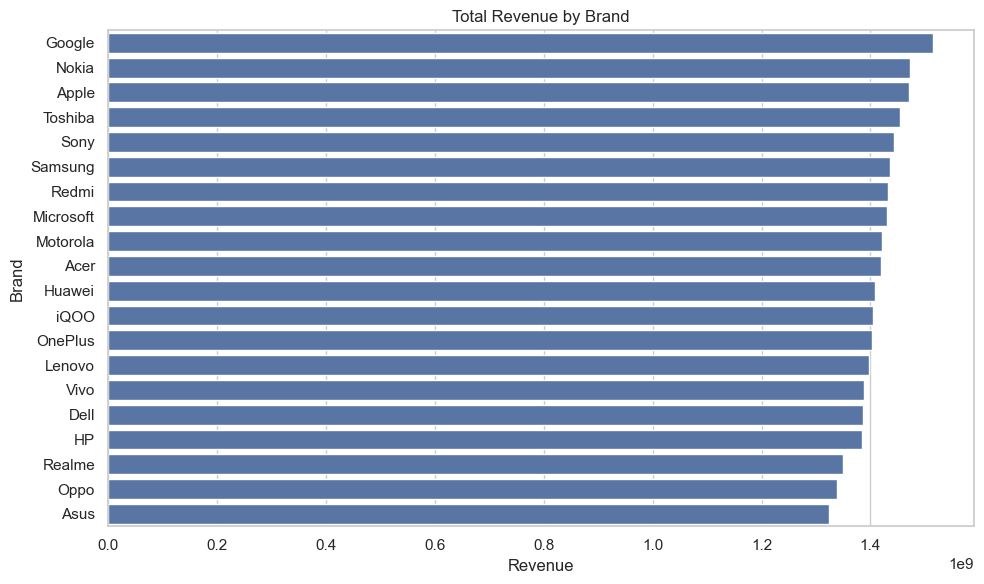

In [20]:
# 1. Total Revenue by Brand
plt.figure(figsize=(10, 6))
revenue_by_brand = df.groupby('Brand')['Revenue'].sum().sort_values(ascending=False)
sns.barplot(x=revenue_by_brand.values, y=revenue_by_brand.index)
plt.title("Total Revenue by Brand")
plt.xlabel("Revenue")
plt.ylabel("Brand")
plt.tight_layout()
plt.show()

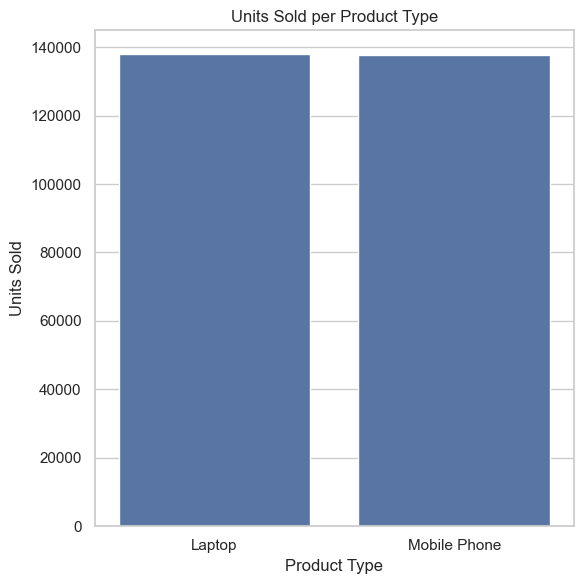

In [21]:
# 2. Units Sold per Product Type
plt.figure(figsize=(6, 6))
units_by_product = df.groupby('Product')['Quantity Sold'].sum()
sns.barplot(x=units_by_product.index, y=units_by_product.values)
plt.title("Units Sold per Product Type")
plt.ylabel("Units Sold")
plt.xlabel("Product Type")
plt.tight_layout()
plt.show()

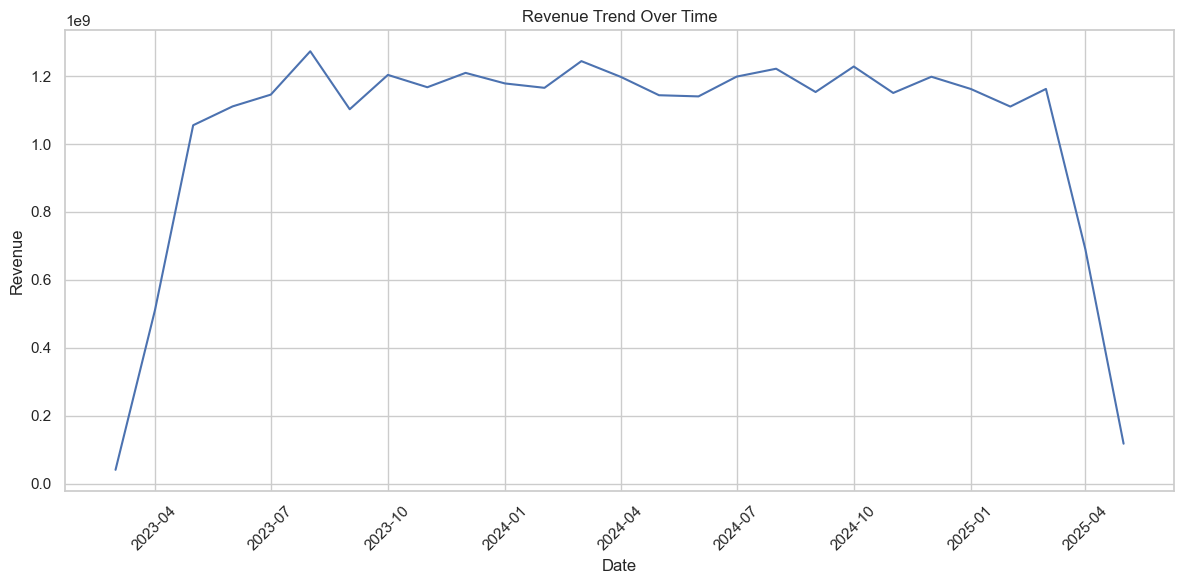

In [22]:
# 3. Revenue Trend Over Time
plt.figure(figsize=(12, 6))
sales_over_time = df.groupby(df['Dispatch Date'].dt.to_period("M"))['Revenue'].sum()
sales_over_time.index = sales_over_time.index.to_timestamp()
sns.lineplot(x=sales_over_time.index, y=sales_over_time.values)
plt.title("Revenue Trend Over Time")
plt.ylabel("Revenue")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

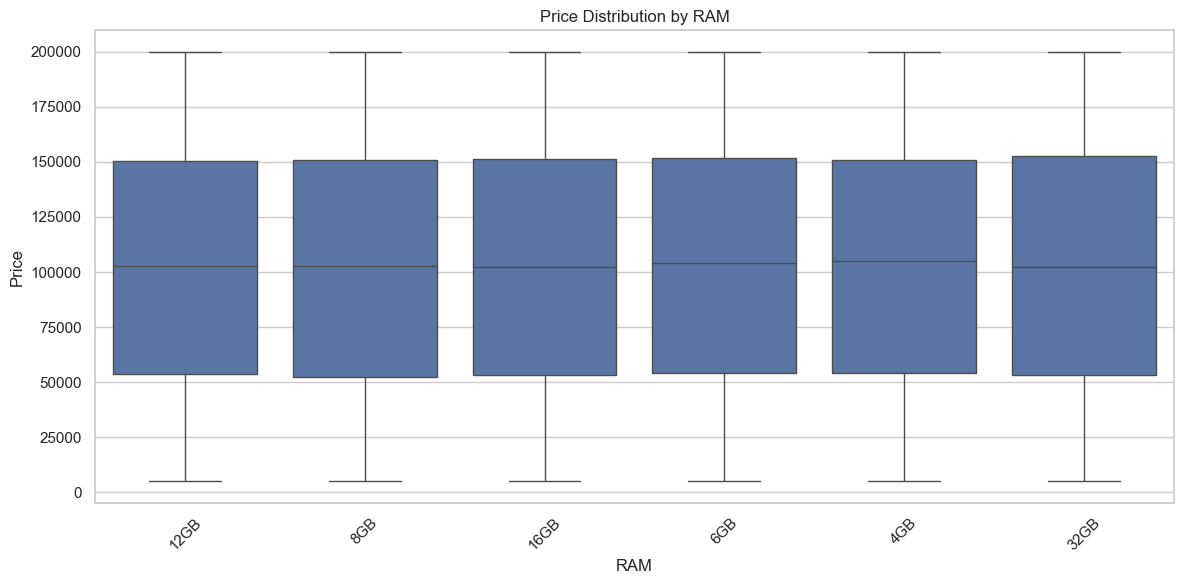

In [23]:
# 4. Price Distribution by RAM
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='RAM', y='Price')
plt.title("Price Distribution by RAM")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

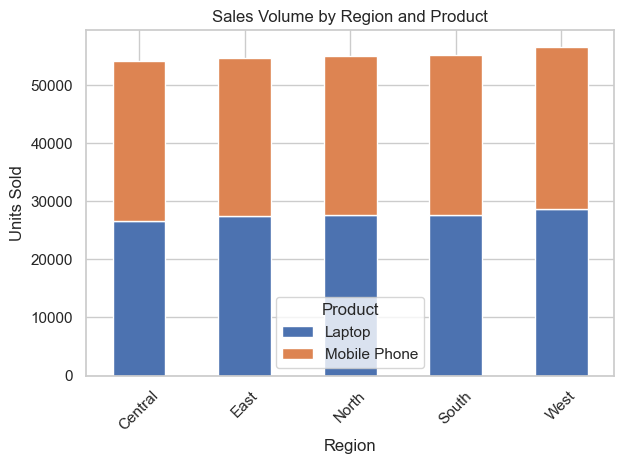

In [24]:
# 5. Sales Volume by Region and Product
plt.figure(figsize=(12, 6))
sales_by_region_product = df.groupby(['Region', 'Product'])['Quantity Sold'].sum().unstack()
sales_by_region_product.plot(kind='bar', stacked=True)
plt.title("Sales Volume by Region and Product")
plt.ylabel("Units Sold")
plt.xticks(rotation=45)
plt.legend(title="Product")
plt.tight_layout()
plt.show()

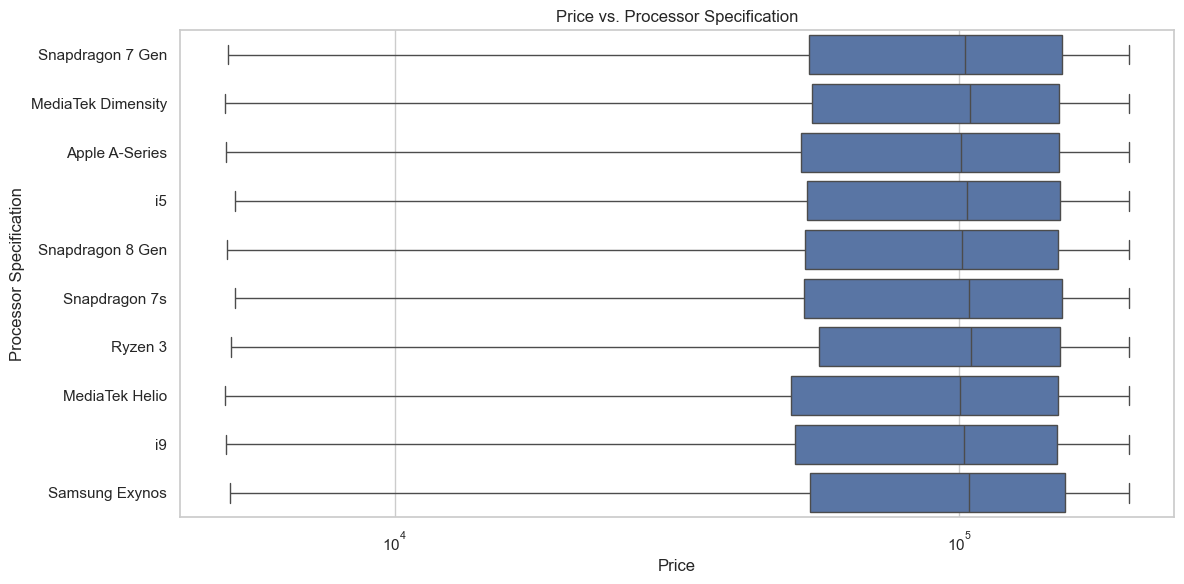

In [25]:
# 6. Price vs. Processor Specification
plt.figure(figsize=(12, 6))
top_processors = df['Processor Specification'].value_counts().nlargest(10).index
filtered_df = df[df['Processor Specification'].isin(top_processors)]
sns.boxplot(data=filtered_df, y='Processor Specification', x='Price')
plt.title("Price vs. Processor Specification")
plt.xscale('log')
plt.tight_layout()
plt.show()